## Graphing Sound Characteristics



Run this code on the files located in the `data` repository.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import wave
import pylab
from scipy import signal

### 1. Spectrogram
Spectrograms are a useful tool in acoustic analysis for visualizing a sound using changes in frequency over time. Spectrograms also generally depict amplitude either by the darkness of the plot or by using different colors. The function below will graph a spectrogram given a .wav file input.

Source for spectrogram code: https://stackoverflow.com/questions/44787437/how-to-convert-a-wav-file-to-a-spectrogram-in-python3

In [2]:
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spectrogram.png')
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate
def save_spec(wav_file):
    graph_spectrogram(wav_file)
    get_wav_info(wav_file)
    pickle.dump([times,frequencies,spectrogram],open('data.pickle','wb')) 
    ## this saves the image as an array for use with the rest of the code

/Users/juliazeh/miniconda/envs/py2env/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


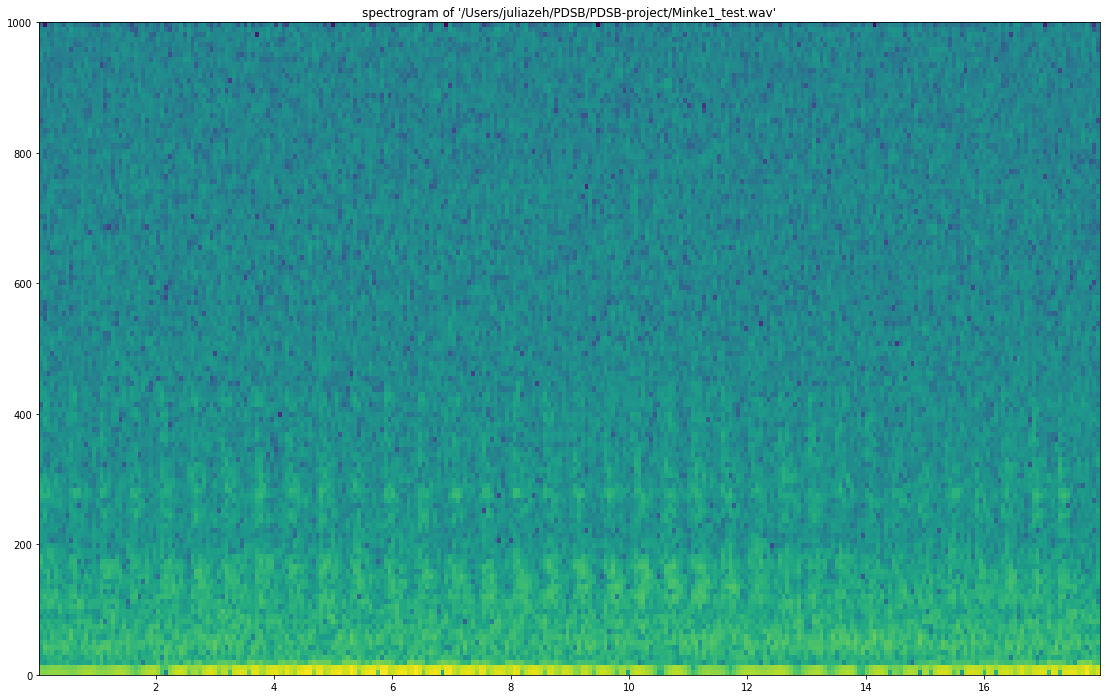

In [3]:
graph_spectrogram('/Users/juliazeh/PDSB/PDSB-project/Minke1_test.wav')

## 2. Waveform
A waveform gives a graph of the amplitude over time of a sound.

Source: assitance from Briley Lewis, a friend studying astrophysics.

In [4]:
def get_waveform(wav_file):
    ## open the data
    data = pickle.load(open('/Users/juliazeh/PDSB/PDSB-project/data_raw.pickle'))
    sample_rate = data[0]
    samples = data[1]
    # find time axis
    seconds = len(samples)/sample_rate
    time_axis = np.linspace(0,seconds,len(samples))
    print len(time_axis)
    #plot waveform
    %matplotlib inline
    plt.plot(time_axis,samples)
    plt.ylabel('amplitude (dBFS)')
    plt.xlabel('time (seconds)')

36046


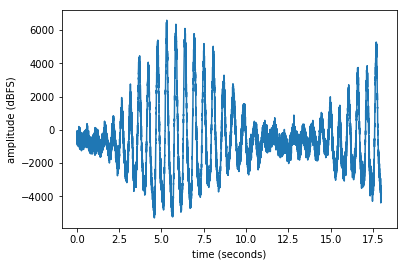

In [5]:
get_waveform('/Users/juliazeh/PDSB/PDSB-project/Minke1_test.wav')

## 3. Periodogram
A periodogram finds the most likely period of a given signal.

Source: assitance from Briley Lewis, a friend studying astrophysics.

In [6]:
def get_periodogram(wav_file):
    ## open the data
    data = pickle.load(open('/Users/juliazeh/PDSB/PDSB-project/data_raw.pickle'))
    samples = data[1]
    f,p = signal.periodogram(samples)
    plt.semilogx(f,p)
    plt.ylabel('power')
    plt.xlabel('frequency (kHz)')

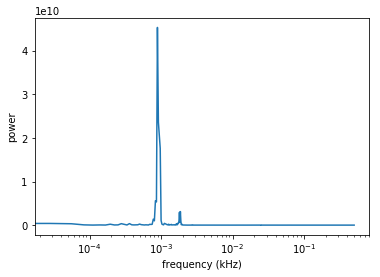

In [7]:
get_periodogram('/Users/juliazeh/PDSB/PDSB-project/Minke1_test.wav')